# Pandas Tutorial

By Nathan Booth

## Objectives
* Recall pandas use cases
* Understand the basic pandas data types
* Import and export data
* Access data by label or position
* Compute summary statistics
* Remove or fill missing data
* Create basic data visualizations with matplotlib
* Create statistical data visualizations with seaborn

## What is pandas?
Pandas is a package built on top of NumPy that enable spreadsheet or table-like relational data visualization with columns and rows. The NumPy foundation allows for fast processing in the background. It has two main data types, the Series and DataFrame.

Series are basically labeled NumPy arrays. DataFrames are basically 2D numpy arrays.

Jake VanderPlas:
> DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

## What is pandas used for?
* data cleaning
* data manipulation
* data exploration
* data analysis
* data visualization combined with matplotlib and seaborn
* data versioning
* documenting processes

In [57]:
import pandas as pd
print(pd.__version__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

0.23.4


## The Series Object

A Series object is a 1D array of indexed data. Think of the Index object as an immutable array.

In [44]:
data = pd.Series([1, 10, 100, 1000])
print(type(data))
data

<class 'pandas.core.series.Series'>


0       1
1      10
2     100
3    1000
dtype: int64

In [45]:
# composed of values and index
print("Values:", data.values)
print("Index:", data.index)

Values: [   1   10  100 1000]
Index: RangeIndex(start=0, stop=4, step=1)


In [46]:
# slice or subset like a numpy array
print(data[1], "\n")
print(data[1:])

10 

1      10
2     100
3    1000
dtype: int64


### What is the difference between a Pandas Series and NumPy Array?

Numpy arrays have implicit indexes while Pandas Series have explicit indexes, which adds flexibility, like the ability to change the index.

In [47]:
data = pd.Series([1, 10, 100, 1000, 10000], index=['Monday', "Tuesday", 'Wednesday', 'Thursday', 'Friday'])
data

Monday           1
Tuesday         10
Wednesday      100
Thursday      1000
Friday       10000
dtype: int64

This makes Series more like Python dictionaries where arbitrary keys are mapped to arbitrary values. The benefit is that Series are much more efficient than Python dictionaries. With a Series we can take both the slicing feature of lists and the key-value mapping feature of dictionaries.

In [48]:
data['Tuesday':'Thursday']

Tuesday        10
Wednesday     100
Thursday     1000
dtype: int64

You can build Series objects manually using [scalars, lists, or dictionaries](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html#Constructing-Series-objects).

## The DataFrame Object

Earlier I stated that DataFrames are like labeled multidimensional arrays. You can also think of them as 2D dictionaries. Or, now that you know what Series are, a DataFrame is a bunch of Series that share an index.

In [49]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)

area_dict = {'California': 423967,
             'Texas': 695662, 
             'New York': 141297,
             'Florida': 170312,
             'Illinois': 149995}
area = pd.Series(area_dict)

print(population, "\n\n", area)

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64 

 California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64


In [50]:
states = pd.DataFrame({'population': population,
                       'area': area})
print(states)

            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995


Each Series shares a row Index object and the column Index stores the column names.

In [51]:
print("Row index:", states.index)
print("Column index:", states.columns)

Row index: Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
Column index: Index(['population', 'area'], dtype='object')


Jake VanderPlas:
> [W]e can also think of a DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data.

In [52]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

You can construct a DataFrame in [multiple ways](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html#Constructing-DataFrame-objects). Later, we will focus on putting existing data into a DataFrame.

## How do you get data into pandas?

Use the appropriate [importing function](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). There are many options.
* CSV file -> `pd.read_csv()`
* Excel file -> `pd.read_excel()`
* JSON file -> `pd.read_json`
* SQL file -> `pd.read_sql()`

In [53]:
df0 = pd.read_csv('one-on-ones2017.csv', encoding='utf-8')
type(df0)

pandas.core.frame.DataFrame

## How can you view the data?

* `df.head()`: view the top rows of data, default is 5
* `df.tail()`: view the bottom rows of data, default is 5
* `df.sample()`: view a random sample of data
* `df.shape`: return the dimensions of the dataframe (tuple, rows x columns)
* `df.info()`: view summary data about the dataframe
* `df.describe()`: view summary statistics about numerical columns of the dataframe

In [55]:
print(df0.head())

       Date           Student Email  Length     Result
0  1/2/2017     emcross23@gmail.com      30  Completed
1  1/3/2017    erikburn13@gmail.ocm      38  Completed
2  1/5/2017          jt1812@att.com      30  Completed
3  1/6/2017       1853934397@qq.com       8    No show
4  1/7/2017  rachel.gants@gmail.com      30  Completed


In [59]:
print(df0.sample(10))

          Date              Student Email  Length     Result
238  5/14/2017             sk1787@att.com      10  Completed
482  7/18/2017       angelhrs@hotmail.com      34  Completed
708  9/13/2017        alivelu10@yahoo.com       0   Canceled
637  8/26/2017        marsdud89@gmail.com      36  Completed
685   9/8/2017       henok.heyi@gmail.com      30  Completed
386  6/20/2017             cc1245@att.com      11  Completed
95   3/27/2017             lc0632@att.com       0   Canceled
432   7/5/2017           sspinn@gmail.com      32  Completed
636  8/25/2017             ms5083@att.com      15    No show
856  11/2/2017  rondelljefferson@live.com      33  Completed


In [60]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 4 columns):
Date             917 non-null object
Student Email    917 non-null object
Length           917 non-null int64
Result           917 non-null object
dtypes: int64(1), object(3)
memory usage: 28.7+ KB


In [62]:
print(df0.describe())

           Length
count  917.000000
mean    19.764449
std     12.604286
min      0.000000
25%     10.000000
50%     23.000000
75%     30.000000
max     50.000000


### Best Practice
Always make changes to a copy of the original data, not the original data itself.


In [63]:
df1 = df0.copy()
print(df1.columns)
df1.columns = [x.lower().replace(" ", "") for x in df1.columns]
df1.columns

Index(['Date', 'Student Email', 'Length', 'Result'], dtype='object')


Index(['date', 'studentemail', 'length', 'result'], dtype='object')

## How do you select data?

* by single column: `df['column_name']` or `df.column_name`
* row slicing: `df[1:3]`
* label: `df.loc[start:stop]`
* position: `df.iloc[start:stop]`
* Boolean indexing: `df[df.col <condition>]`

In [66]:
df1['result'].head()

0    Completed
1    Completed
2    Completed
3      No show
4    Completed
Name: result, dtype: object

In [65]:
df1.result.head()

0    Completed
1    Completed
2    Completed
3      No show
4    Completed
Name: result, dtype: object

In [77]:
print(df1[['date', 'length', 'result']].head())

       date  length     result
0  1/2/2017      30  Completed
1  1/3/2017      38  Completed
2  1/5/2017      30  Completed
3  1/6/2017       8    No show
4  1/7/2017      30  Completed


In [80]:
print(df1.loc[:, ['date', 'length', 'result']].head())

       date  length     result
0  1/2/2017      30  Completed
1  1/3/2017      38  Completed
2  1/5/2017      30  Completed
3  1/6/2017       8    No show
4  1/7/2017      30  Completed


In [85]:
print(df1[100:105])

          date                   studentemail  length     result
100  3/29/2017         silas501@sbcglobal.net      14  Completed
101  3/29/2017  francois.michon.mtl@gmail.com      43  Completed
102  3/30/2017          luismigel@hotmail.com      30  Completed
103  3/31/2017        navalkulkarni@gmail.com      25  Completed
104  3/31/2017        jsuganya91ece@gmail.com      25  Completed


In [84]:
df1.iloc[101]

date                                3/29/2017
studentemail    francois.michon.mtl@gmail.com
length                                     43
result                              Completed
Name: 101, dtype: object

In [86]:
print(df1.iloc[100:105])

          date                   studentemail  length     result
100  3/29/2017         silas501@sbcglobal.net      14  Completed
101  3/29/2017  francois.michon.mtl@gmail.com      43  Completed
102  3/30/2017          luismigel@hotmail.com      30  Completed
103  3/31/2017        navalkulkarni@gmail.com      25  Completed
104  3/31/2017        jsuganya91ece@gmail.com      25  Completed


In [96]:
print(df1.iloc[100:105, [0, 2, 3]])

          date  length     result
100  3/29/2017      14  Completed
101  3/29/2017      43  Completed
102  3/30/2017      30  Completed
103  3/31/2017      25  Completed
104  3/31/2017      25  Completed


In [89]:
print(df1[df1.length > 45])

           date             studentemail  length     result
384   6/20/2017         cm3568@gmail.com      47  Completed
706   9/13/2017      mrlowe317@gmail.com      46  Completed
892  11/13/2017  gibranhasan14@gmail.com      47  Completed
893  11/13/2017  ceilimcgeever@gmail.com      47  Completed
914  11/28/2017      j@jackiemjensen.com      50  Completed


In [90]:
df1['result'] = df1.result.astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 4 columns):
date            917 non-null object
studentemail    917 non-null object
length          917 non-null int64
result          917 non-null category
dtypes: category(1), int64(1), object(2)
memory usage: 22.6+ KB


In [91]:
df1['result'].describe()

count           917
unique            3
top       Completed
freq            668
Name: result, dtype: object

In [92]:
df2 = df1.groupby('result').size()
df2

result
Canceled     141
Completed    668
No show      108
dtype: int64

## Missing Data

Missing data can manifest in multiple ways. When pandas recognizes that data is missing, it will display a `NaN` (Not a Number) in its cell. Humans may use text like "Missing", "NA", or "" (an empty string).


In [125]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

print(df)

        one       two     three
a -0.209047 -0.391041  0.496835
b       NaN       NaN       NaN
c -0.020879  0.068483  3.034713
d       NaN       NaN       NaN
e  0.162937  0.529892 -1.228484
f  0.102020  0.170321 -0.289752
g       NaN       NaN       NaN
h -0.517551  1.488103 -0.043176


## Simple Data Visualizations

Lets see the distribution of sessions lengths using the `DataFrame.hist()` method that uses `matplotlib` in the background.

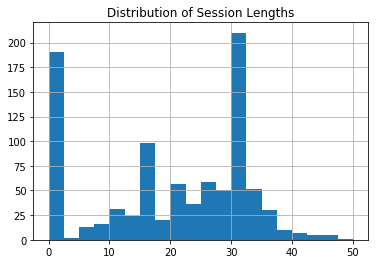

In [106]:
df1['length'].hist(bins=20)
plt.title('Distribution of Session Lengths')
plt.show()

Lets see how `seaborn` displays a similar plot. Seaborn also uses matplotlib in the background.

C:\Users\booth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


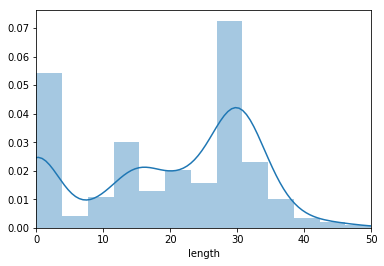

In [114]:
sns.distplot(df1['length'])
plt.xlim([0,50])
plt.show()

Lets view how time is spent on each result type.

C:\Users\booth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


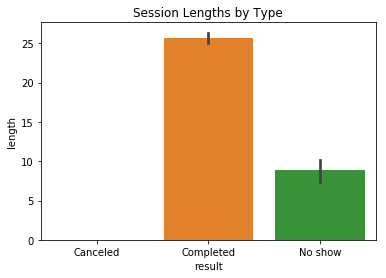

In [104]:
sns.barplot(x = 'result', y = 'length', data=df1)
plt.title("Session Lengths by Type")
plt.show()

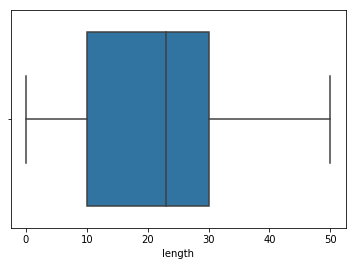

In [121]:
sns.boxplot(x=df1.loc[:, 'length'])

## Resources

* Jake VanderPlas's [pandas chapter](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) from his book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
* Karlijn Willems's of DataCamp [pandas tutorial](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
* Tutorialspoint [pandas tutorial](https://www.tutorialspoint.com/python_pandas)